In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pickle, os


In [2]:
# import holoviews as hv
# hv.notebook_extension()


In [3]:
BES_data_folder = "../BES_analysis_data/"
BES_code_folder = "../BES_analysis_code/"
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta")
BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_v0.3.dta")



In [144]:
BES_Panel['euRefVote']

0                 Leave the EU
1                 Leave the EU
2                 Leave the EU
3        Stay/remain in the EU
4                 Leave the EU
5        Stay/remain in the EU
6                 Leave the EU
7                 Leave the EU
8                 Leave the EU
9                 Leave the EU
10       Stay/remain in the EU
11                Leave the EU
12                Leave the EU
13                Leave the EU
14                Leave the EU
15                Leave the EU
16                Leave the EU
17       Stay/remain in the EU
18                Leave the EU
19                Leave the EU
20       Stay/remain in the EU
21       Stay/remain in the EU
22                Leave the EU
23       Stay/remain in the EU
24       Stay/remain in the EU
25       Stay/remain in the EU
26       Stay/remain in the EU
27                Leave the EU
28       Stay/remain in the EU
29                Leave the EU
                 ...          
30289             Leave the EU
30290   

In [70]:
wave = ""   # "W10"

BES_Panel["new_eu_split"] = BES_Panel['euRefVote'+wave].astype('object')



BES_Panel.loc[ (BES_Panel['euRefDoOver'+wave]=="Yes")
             & (BES_Panel['euRefVote'+wave]=='Stay/remain in the EU'),
             "new_eu_split"]  = "Hard Remain"

BES_Panel.loc[ (BES_Panel['euRefDoOver'+wave]!="Yes")
             & (BES_Panel['euRefVote'+wave]=='Stay/remain in the EU'),
             "new_eu_split"]  = "Re-Leave"

BES_Panel.loc[ (BES_Panel['euRefDoOver'+wave]=="No")
             & (BES_Panel['euRefVote'+wave]=='Leave the EU'),
             "new_eu_split"]  = "Hard Leave"

BES_Panel.loc[ (BES_Panel['euRefDoOver'+wave]!="No")
             & (BES_Panel['euRefVote'+wave]=='Leave the EU'),
             "new_eu_split"]  = "Leave but favour sec. ref"

BES_Panel["new_eu_split"] = BES_Panel["new_eu_split"].astype('category')

In [71]:
BES_Panel["new_eu_split"].value_counts()

Hard Leave                   12127
Hard Remain                  10667
Re-Leave                      4349
Don't know                    1450
I would/will not vote         1118
Leave but favour sec. ref      608
Name: new_eu_split, dtype: int64

In [145]:

crosstab = pd.crosstab(index   = BES_Panel[ 'euRefVote' ],
                       columns = BES_Panel[ "profile_eurefvote"],
                       values  = BES_Panel[ "wt_full_W10" ],
                       aggfunc = sum,
                       normalize=True)
crosstab

profile_eurefvote,Stay/remain in the EU,Leave the EU,Don't know
euRefVote,,,
Stay/remain in the EU,0.462216,0.031909,0.001215
Leave the EU,0.019749,0.430594,0.001846
I would/will not vote,0.004456,0.008793,0.000525
Don't know,0.013133,0.022531,0.003031


In [72]:
crosstab = pd.crosstab(index   = BES_Panel[ 'euRefVote'+wave ],
                       columns = BES_Panel[ 'euRefDoOver'+wave ],
                       values  = BES_Panel[ "wt_full_W10" ],
                       aggfunc = sum,
                       normalize=True)
crosstab

euRefDoOver,No,Yes,Don't know
euRefVote,,,
Stay/remain in the EU,0.092438,0.345167,0.048612
Leave the EU,0.402135,0.014854,0.010252
I would/will not vote,0.021888,0.004621,0.009942
Don't know,0.020790,0.007445,0.021855


In [73]:
## What is the difference between a Re-Leaver and a Hard Remainer?

# We need a nice numerical set of data

In [4]:
wave = "W10_only"

BES_numeric = pd.read_hdf( BES_data_folder+"BESnumeric"+wave+".hdf", "BESnumeric"+wave )
print("BES_numeric",  BES_numeric.shape )
var_type    = pd.read_hdf( BES_data_folder+"var_type"+wave+".hdf", "var_type" )
print("var_type",  var_type.shape )
BES_reduced = pd.read_hdf( BES_data_folder+"BES_reduced"+wave+".hdf", "BES_reduced"+wave )
print("BES_reduced",  BES_reduced.shape )
BES_reduced_with_na = pd.read_hdf( BES_data_folder+"BES_reduced_with_na"+wave+".hdf", "BES_reduced_with_na"+wave )
print("BES_reduced_with_na",  BES_reduced_with_na.shape )

fname = BES_data_folder+"cat_dictionary"+wave+".pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
    print("cat_dictionary", len(cat_dictionary))
    
fname = BES_data_folder+"new_old_col_names"+wave+".pkl"
with open(fname, "rb") as f:
    new_old_col_names = pickle.load( f )
    print("new_old_col_names", len(new_old_col_names))


BES_numeric (30319, 374)
var_type (393, 1)
BES_reduced (30319, 444)
BES_reduced_with_na (30319, 444)
cat_dictionary 368
new_old_col_names 447


In [5]:
# BES_reduced = pd.read_hdf( BES_data_folder+"BES_reduced"+wave+".hdf", "BES_reduced"+wave )
# print("BES_reduced",  BES_reduced.shape )

In [164]:
Remainers = (BES_Panel["new_eu_split"] == "Hard Remain") | (BES_Panel["new_eu_split"] =="Re-Leave")
Remainers = Remainers & (BES_Panel[ "profile_eurefvote"] == "Stay/remain in the EU")

In [163]:
BES_Panel["profile_eurefvote"][Remainers].value_counts()

Stay/remain in the EU    13050
Leave the EU               664
Don't know                  44
Name: profile_eurefvote, dtype: int64

In [165]:
BES_reduced["Re-Leave"] = (BES_Panel["new_eu_split"] == "Re-Leave")


In [167]:

corr = BES_reduced[Remainers].drop(["Re-Leave", "euRefVote_Leave the EU","euRefDoOver_Yes" ],axis=1).\
    corrwith(BES_reduced["Re-Leave"][Remainers]).sort_values()
corr

expectGoodConductEURef__Conducted unfairly           -0.246090
euLeaveBigBusiness__Much more likely                 -0.199727
leaveImpactBritain__A very large impact              -0.197332
euID3__Strongly agree                                -0.190906
leaveImpactSelf__A very large impact                 -0.182840
europeanness__Very strongly European                 -0.173599
socialIdentityGlobalRemain__A great deal in common   -0.163983
euLeaveScotIndep__Much more likely                   -0.161354
euID7__Strongly agree                                -0.160675
approveEU__Strongly approve                          -0.160152
euID1__Strongly agree                                -0.157247
euID6__Strongly agree                                -0.143727
effectsEUUnemployment__Much higher                   -0.135337
euID4__Strongly agree                                -0.122837
changeEconomyLab__Getting a lot better               -0.122000
ethno3__Strongly agree                               -0

In [158]:
corr["profile_eurefvote_Leave the EU"]

0.016918123063923336

In [5]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [168]:
target = BES_reduced[Remainers]["Re-Leave"].astype('int')

clean_feature_set_std = StandardScaler().fit_transform(BES_reduced[Remainers].values )
BES_Rem = pd.DataFrame(      clean_feature_set_std,
                             columns = BES_reduced[Remainers].columns,
                             index   = BES_reduced[Remainers].index      )

train_cols = BES_Rem.drop(["Re-Leave", "euRefVote_Leave the EU","euRefDoOver_Yes",
                           "edlevel__Postgrad","al_scale__Authoritarian","lr_scale__Right",
                          "profile_eurefvote_Leave the EU","profile_eurefturnout_Yes, voted"],axis=1)


C:\ANACON~1\envs\BES_analysis\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [169]:
%%time
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit( target,
                  train_cols )

# fit the model
# result = logit.fit(maxiter=70)

result = logit.fit(method='bfgs',maxiter=200) # converges only if forced!

Optimization terminated successfully.
         Current function value: 0.478002
         Iterations: 166
         Function evaluations: 168
         Gradient evaluations: 168
Wall time: 11.3 s


In [170]:
np.linalg.matrix_rank(train_cols.values),train_cols.shape

(415, (13050, 415))

In [171]:
%%time
# check for rank deficient columns!

rank = np.linalg.matrix_rank(train_cols.values)
for def_col in train_cols.columns:
    rank_minus_def_col = np.linalg.matrix_rank(train_cols.drop(def_col,axis=1).values)
    if (rank==rank_minus_def_col):
        print(def_col)
        

Wall time: 3min 4s


In [172]:
qr = np.linalg.qr(train_cols.values)[1]

In [173]:
qr.shape

(415, 415)

In [113]:
def_cols = train_cols.columns[np.abs(np.sum(qr,axis=1))<2 ]

In [153]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Re-Leave   No. Observations:                15016
Model:                          Logit   Df Residuals:                    14599
Method:                           MLE   Df Model:                          416
Date:                Wed, 14 Jun 2017   Pseudo R-squ.:                  0.1948
Time:                        17:31:22   Log-Likelihood:                -7276.8
converged:                       True   LL-Null:                       -9036.9
                                        LLR p-value:                     0.000
==============================================================================================================================================================================================================
                                                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
turnoutUKGeneral__Very likely that I will vote                                                                                                -0.0362      0.027     -1.361      0.173      -0.088       0.016
generalElectionCertainty__Completely certain                                                                                                  -0.0895      0.024     -3.758      0.000      -0.136      -0.043
partyIdStrength__Not very strong                                                                                                               0.0407      0.025      1.631      0.103      -0.008       0.090
happyEULeave__Extremely happy                                                                                                                  0.3807      0.027     14.354      0.000       0.329       0.433
regretsIHaveAFew__3.0                                                                                                                         -0.1877      0.032     -5.819      0.000      -0.251      -0.124
expectGoodConductEURef__Conducted unfairly                                                                                                    -0.3168      0.023    -13.593      0.000      -0.362      -0.271
polAttention__Pay a great deal of attention                                                                                                    0.0268      0.032      0.839      0.402      -0.036       0.090
britishness__Very strongly British                                                                                                            -0.0180      0.031     -0.585      0.559      -0.078       0.042
englishness__Very strongly English                                                                                                             0.0084      0.032      0.261      0.794      -0.054       0.071
europeanness__Very strongly European                                                                                                          -0.0576      0.026     -2.176      0.030      -0.109      -0.006
likeMay__Strongly like                                                                                                                         0.1069      0.039      2.709      0.007       0.030       0.184
likeCorbyn__Strongly like                                                                                                                      0.1093      0.038      2.903      0.004       0.036       0.183
likeFarron__Strongly like                                                                                                               

In [47]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Re-Leave   No. Observations:                15016
Model:                          Logit   Df Residuals:                    14574
Method:                           MLE   Df Model:                          441
Date:                Tue, 13 Jun 2017   Pseudo R-squ.:                  0.1958
Time:                        17:24:34   Log-Likelihood:                -7267.3
converged:                       True   LL-Null:                       -9036.9
                                        LLR p-value:                     0.000
                                                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import datetime
datetime.datetime.now()

In [35]:
train_cols.describe()

,turnoutUKGeneral__Very likely that I will vote,generalElectionCertainty__Completely certain,partyIdStrength__Not very strong,happyEULeave__Extremely happy,regretsIHaveAFew__3.0,expectGoodConductEURef__Conducted unfairly,polAttention__Pay a great deal of attention,britishness__Very strongly British,englishness__Very strongly English,europeanness__Very strongly European,...,achieveReduceImmigUKIP_Yes,achieveReduceImmigNone_Yes,achieveReduceImmigDK_Yes,"profile_turnout_2015_Yes, voted",profile_eurefvote_Leave the EU,"profile_eurefturnout_Yes, voted",gender_Female,privPrimSchoolW1W2W3W4W7W9_Yes,privSecondSchoolW1W2W3W4W7W9_Yes,neverPrivSchoolW1W2W3W4W7W9_Yes
count,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,...,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000
mean,3.668953,5.310935,1.129529,1.335975,0.198322,2.518980,6.726425,4.291556,3.480887,3.847762,...,0.222363,0.374068,0.284497,0.881593,0.044219,0.924680,0.648508,0.079582,0.125666,0.842768
std,0.866030,0.971428,0.638381,2.022781,0.534734,1.287885,2.333844,1.635307,2.160995,1.639952,...,0.415847,0.483897,0.451189,0.323100,0.205589,0.263915,0.477452,0.270654,0.331484,0.364032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,1.000000,0.000000,0.000000,2.000000,6.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,7.000000,5.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,4.000000,6.000000,2.000000,2.000000,0.000000,4.000000,8.000000,6.000000,5.000000,5.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,4.000000,6.000000,2.000000,10.000000,2.000000,4.000000,10.000000,6.000000,6.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [174]:
result.params.sort_values()

xprofile_ethnicity_White and Black African                           -0.329043
expectGoodConductEURef__Conducted unfairly                           -0.323577
profile_religion_Yes - Brethren                                      -0.258806
xprofile_religion_Yes - Islam                                        -0.167831
euLeaveScotIndep__Much more likely                                   -0.153679
likeFarron__Strongly like                                            -0.151634
al2__Strongly agree                                                  -0.145182
leftRight__Right                                                     -0.144573
profile_past_vote_2005_Veritas                                       -0.138612
overseasAid__Strongly agree                                          -0.126286
euID3__Strongly agree                                                -0.118960
xprofile_house_tenure_Rent â from a private landlord               -0.111338
xprofile_religion_Yes â Orthodox Christian        

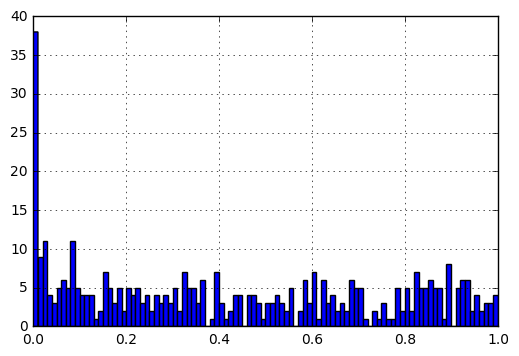

In [175]:
result.pvalues.hist(bins=100)

In [176]:
result.params[result.pvalues<0.05].sort_values()

expectGoodConductEURef__Conducted unfairly                                  -0.323577
xprofile_religion_Yes - Islam                                               -0.167831
euLeaveScotIndep__Much more likely                                          -0.153679
likeFarron__Strongly like                                                   -0.151634
al2__Strongly agree                                                         -0.145182
leftRight__Right                                                            -0.144573
overseasAid__Strongly agree                                                 -0.126286
euID3__Strongly agree                                                       -0.118960
xprofile_house_tenure_Rent â from a private landlord                      -0.111338
xprofile_religion_Yes â Orthodox Christian                                -0.110615
bestOnMII_Liberal Democrat                                                  -0.108170
lr3__Strongly agree                                   

In [6]:
# Not right!
#BES_Panel["regretsIHaveAFew"]
#Categories (4, object): [No < Yes < 3 < Don't know]


In [ ]:
## Look at age split for Conservative/Labour support
# Does this come from age or is it driven by social values (like euref)

In [7]:
import seaborn as sns

In [8]:
age_categories = cat_dictionary[new_old_col_names['ageGroup__66+']]

ageGroups = BES_reduced_with_na['ageGroup__66+']\
    .dropna()\
    .astype('int')\
    .apply(lambda x: age_categories[x])

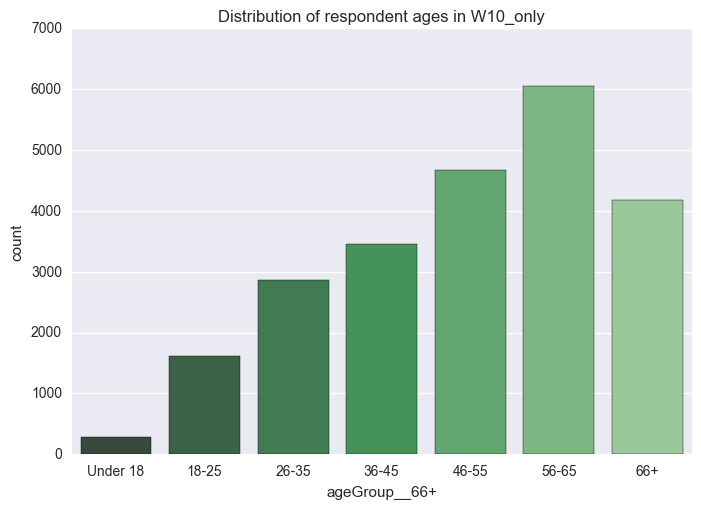

In [9]:
sns.countplot(x=ageGroups, palette="Greens_d", order = age_categories );
plt.title("Distribution of respondent ages in " + wave )

In [10]:
print( "al_scale__Authoritarian null values: ", sum( BES_reduced_with_na.al_scale__Authoritarian.isnull() ), 
       'ageGroup__66+ null values: ', sum( BES_reduced_with_na['ageGroup__66+'].isnull() ) )

al_scale__Authoritarian null values:  4157 ageGroup__66+ null values:  7195


In [11]:
non_nans =  (BES_reduced_with_na.al_scale__Authoritarian.notnull())\
          & (BES_reduced_with_na['ageGroup__66+'].notnull())
print( "combined null values: ", sum(~non_nans ))

combined null values:  10147


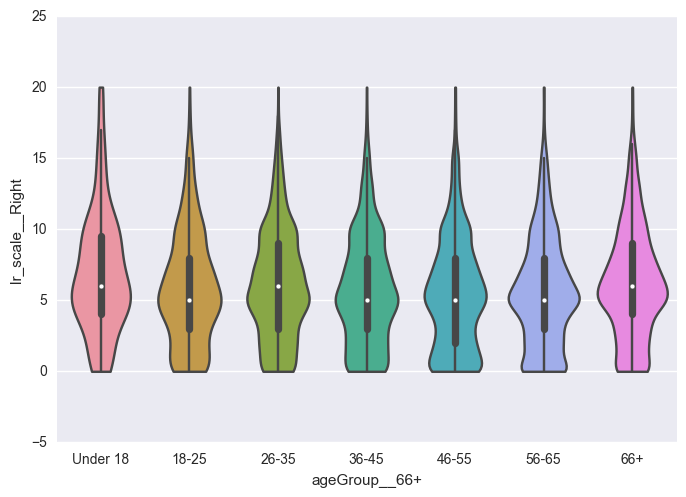

In [36]:
sns.violinplot(x=ageGroups,
               y=BES_reduced_with_na.lr_scale__Right,
               inner='box', order = age_categories, cut=0);

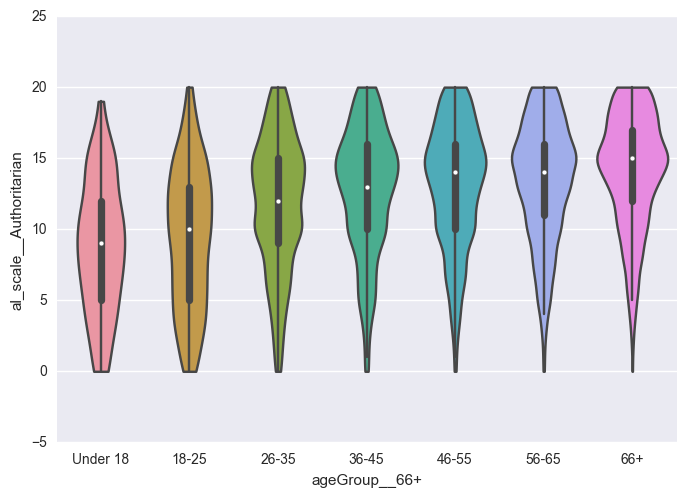

In [12]:
sns.violinplot(x=ageGroups[non_nans],
               y=BES_reduced_with_na.al_scale__Authoritarian[non_nans],
               inner='box', order = age_categories, cut=0);

In [13]:
# is al_scale a reasonable metric for soc lib/con (over age)?

BES_reduced_with_na[['ageGroup__66+',
                     "al_scale__Authoritarian",
                     "al1__Strongly agree",
                     "al2__Strongly agree",
                     "al3__Strongly agree",
                     "al4__Strongly agree",
                     "al5__Strongly agree"]].corr()

,ageGroup__66+,al_scale__Authoritarian,al1__Strongly agree,al2__Strongly agree,al3__Strongly agree,al4__Strongly agree,al5__Strongly agree
ageGroup__66+,1.000000,0.242944,0.228892,0.135136,0.207140,0.212600,0.137050
al_scale__Authoritarian,0.242944,1.000000,0.810542,0.794306,0.779892,0.672553,0.803483
al1__Strongly agree,0.228892,0.810542,1.000000,0.528691,0.619020,0.416562,0.596627
al2__Strongly agree,0.135136,0.794306,0.528691,1.000000,0.460343,0.343158,0.589384
al3__Strongly agree,0.207140,0.779892,0.619020,0.460343,1.000000,0.433326,0.562477
al4__Strongly agree,0.212600,0.672553,0.416562,0.343158,0.433326,1.000000,0.395184
al5__Strongly agree,0.137050,0.803483,0.596627,0.589384,0.562477,0.395184,1.000000


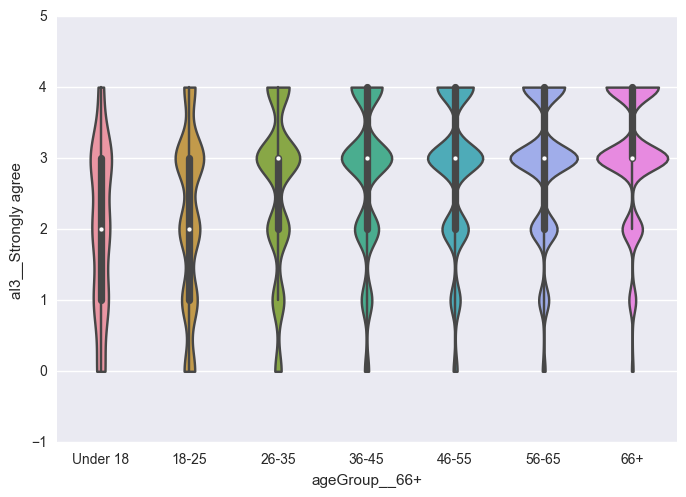

In [93]:
sns.violinplot(x=ageGroups[non_nans],
               y=BES_reduced_with_na["al3__Strongly agree"][non_nans],
               inner='box', order = age_categories, cut=0);

In [82]:
BES_reduced_with_na[['ageGroup__66+',
                     "al_scale__Authoritarian",
                     "al1__Strongly agree",
                     "al2__Strongly agree",
                     "al3__Strongly agree",
                     "al4__Strongly agree",
                     "al5__Strongly agree"]].isnull().sum()

ageGroup__66+              7195
al_scale__Authoritarian    4157
al1__Strongly agree        1988
al2__Strongly agree        2128
al3__Strongly agree        1406
al4__Strongly agree        1914
al5__Strongly agree        1818
dtype: int64

In [95]:
[x for x in BES_reduced_with_na.columns if "generalElectionVote" in x]

['generalElectionVote_Labour',
 'generalElectionVote_United Kingdom Independence Party (UKIP)',
 'generalElectionVote_Liberal Democrat',
 'generalElectionVote_Scottish National Party (SNP)',
 'generalElectionVote_Green Party',
 'generalElectionVote_Plaid Cymru']

In [104]:
BES_reduced_with_na[['generalElectionVote_Labour',
 'generalElectionVote_United Kingdom Independence Party (UKIP)',
 'generalElectionVote_Liberal Democrat',
 'generalElectionVote_Scottish National Party (SNP)',
 'generalElectionVote_Green Party',
 'generalElectionVote_Plaid Cymru']].sum(axis=1).sum()

14161.0

In [101]:
BES_reduced_with_na['generalElectionVote_Labour'].sum()

6587.0

In [109]:
(BES_Panel["generalElectionVote"]=="Conservative").sum()

8713

In [110]:
(BES_Panel["generalElectionVote"]=="Labour").sum()

6587

In [48]:
Conservative_or_Labour = (BES_Panel["generalElectionVote"]=="Conservative") # 1 for Conservative
Conservative_or_Labour[BES_Panel["generalElectionVote"]=="Conservative"] = "Conservative"
Conservative_or_Labour[BES_Panel["generalElectionVote"]=="Labour"] = "Labour"
# 0 for Labour

In [49]:
Conservative_or_Labour[ (BES_Panel["generalElectionVote"]!="Conservative")
                      & (BES_Panel["generalElectionVote"]!="Labour") ] = np.nan # nan for neither

Conservative_or_Labour = Conservative_or_Labour\
                        .astype('category')\
                        .cat.reorder_categories([ "Labour" , "Conservative" ], ordered=True)


In [54]:
Conservative_or_Labour.value_counts()

Conservative    8713
Labour          6587
dtype: int64

In [28]:
print( "generalElectionVote neither Conservative or Labour: ", sum( Conservative_or_Labour.isnull() ) )

generalElectionVote neither Conservative or Labour:  15019


In [29]:
non_nans =  ( non_nans )\
          & ( Conservative_or_Labour.notnull() )
print( "combined null values: ", sum(~non_nans ))

combined null values:  19657


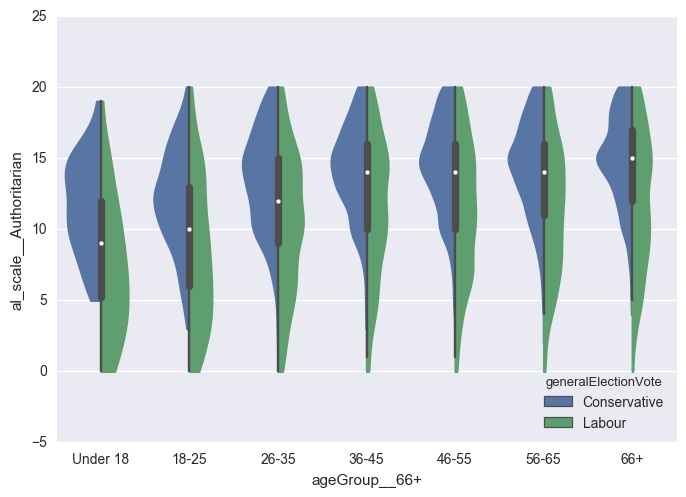

In [31]:
sns.violinplot(x=ageGroups[non_nans],
               y=BES_reduced_with_na.al_scale__Authoritarian[non_nans],
               hue=Conservative_or_Labour[non_nans], split=True,
               inner='box', order = age_categories, cut=0);

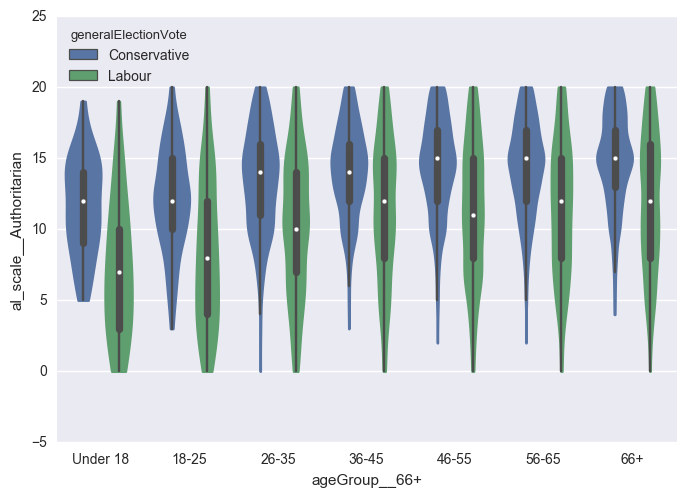

In [32]:
sns.violinplot(x=ageGroups[non_nans],
               y=BES_reduced_with_na.al_scale__Authoritarian[non_nans],
               hue=Conservative_or_Labour[non_nans],
               inner='box', order = age_categories, cut=0);

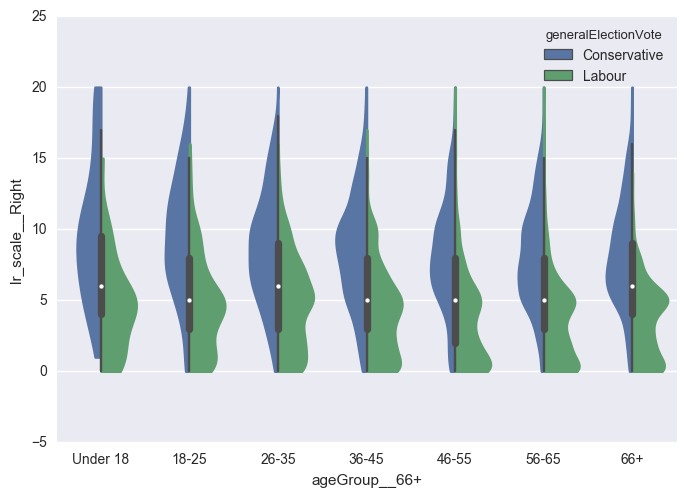

In [33]:
sns.violinplot(x=ageGroups,
               y=BES_reduced_with_na.lr_scale__Right,
               hue=Conservative_or_Labour, split=True,
               inner='box', order = age_categories, cut=0);

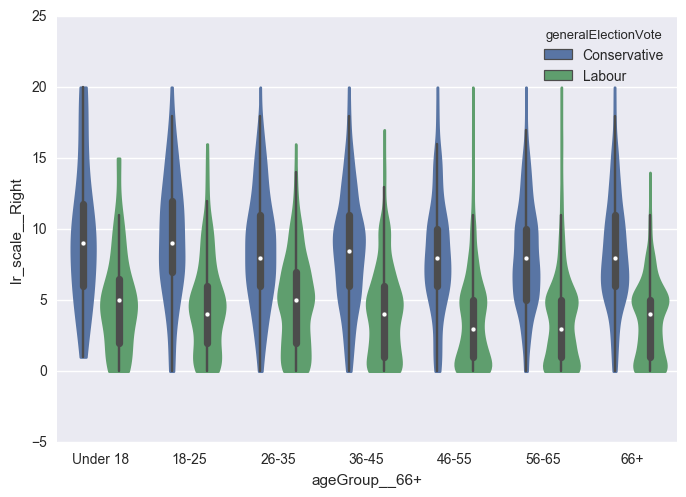

In [34]:
sns.violinplot(x=ageGroups,
               y=BES_reduced_with_na.lr_scale__Right,
               hue=Conservative_or_Labour,
               inner='box', order = age_categories, cut=0);

In [ ]:
# okay - so what does predict Conservative/Labour support? (as of Nov/Dec 2016)

In [55]:
BES_reduced.drop([ ],axis=1).\
    corrwith(Conservative_or_Labour.cat.codes).sort_values()

generalElectionVote_Labour                                            -0.348192
generalElectionVote_United Kingdom Independence Party (UKIP)          -0.285385
generalElectionVote_Liberal Democrat                                  -0.276701
lr1__Strongly agree                                                   -0.268949
lr4__Strongly agree                                                   -0.255393
lr3__Strongly agree                                                   -0.245195
renationaliseRail__Strongly agree                                     -0.232644
profile_past_vote_2015_Labour                                         -0.224829
likeGrn__Strongly like                                                -0.222347
ptvGrn__Very likely                                                   -0.218170
efficacyNoMatter__Strongly agree                                      -0.214578
partyId_No - none                                                     -0.209439
efficacyPolCare__Strongly agree         

In [62]:
target = Conservative_or_Labour[Conservative_or_Labour.notnull()].cat.codes

clean_feature_set_std = StandardScaler()\
                        .fit_transform( BES_reduced[Conservative_or_Labour.notnull()].values )
    
BES_Rem = pd.DataFrame(      clean_feature_set_std,
                             columns = BES_reduced[Conservative_or_Labour.notnull()].columns,
                             index   = BES_reduced[Conservative_or_Labour.notnull()].index      )

train_cols = BES_Rem.drop(def_col_list,axis=1)


In [63]:
%%time
# check for rank deficient columns!
def_col_list = []

rank = np.linalg.matrix_rank(train_cols.values)
for def_col in train_cols.columns:
    rank_minus_def_col = np.linalg.matrix_rank(train_cols.drop(def_col,axis=1).values)
    if (rank==rank_minus_def_col):
        def_col_list.append(def_col)
        print(def_col)

Wall time: 1min 3s


In [64]:
np.linalg.matrix_rank(train_cols.values),train_cols.shape

(253, (15300, 253))

In [67]:
%%time
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit( target,
                  train_cols )

# fit the model
# result = logit.fit(maxiter=70)

result = logit.fit(method='bfgs',maxiter=300) # converges only if forced!

Optimization terminated successfully.
         Current function value: 0.050522
         Iterations: 218
         Function evaluations: 219
         Gradient evaluations: 219
Wall time: 4.1 s


In [68]:
result.params[result.pvalues<0.05].sort_values()

likeLab__Strongly like                                               -1.812882
ptvLab__Very likely                                                  -1.158950
likeCorbyn__Strongly like                                            -0.931294
changeEconomyLab__Getting a lot better                               -0.619025
achieveReduceImmigLab_Yes                                            -0.586597
euPriorityBalance__Control immigration                               -0.438496
redistCon__Government should be less concerned about equal incomes   -0.406301
immigLab__Allow many more                                            -0.370680
bestPM_Jeremy Corbyn                                                 -0.346629
majorityPartyLab__Very likely                                        -0.329105
immigSelf__Allow many more                                           -0.293547
ptvUKIP__Very likely                                                 -0.286460
labLookAfterUnemp__Very closely                     

In [ ]:
## Comparison with Wave8 data (e.g. are they acting consistently with what they said before the referendum?)

In [22]:
BES_Panel['euRefFinalW8'].value_counts()

The decision will be final            15760
There might be a second referendum    11318
Don't know                             6424
Name: euRefFinalW8, dtype: int64

In [30]:
crosstab = pd.crosstab(index   = BES_Panel[ 'euRefVoteW8' ],
                       columns = BES_Panel[ 'euRefFinalW8' ],
                       values  = BES_Panel[ "wt_full_W8" ],
                       aggfunc = sum,
                       normalize=True)
100*crosstab

euRefFinalW8,The decision will be final,There might be a second referendum,Don't know
euRefVoteW8,,,
Stay/remain in the EU,21.081095,15.017625,9.339418
Leave the EU,22.991982,17.076721,6.383714
I would/will not vote,0.202659,0.244076,1.076633
Don't know,1.969379,2.010493,2.606205


In [34]:
BES_Remain = BES_Panel[ BES_Panel['euRefVoteW10']== 'Stay/remain in the EU' ]

In [46]:
BES_W10_do_over = BES_Remain['euRefDoOverW10'].cat.reorder_categories(['No', 'Don\'t know', 'Yes' ]).cat.codes

BES_W10_do_over.replace(-1,np.nan,inplace=True)

In [45]:
BES_W8_do_over = BES_Remain['euRefFinalW8'].cat.reorder_categories(['The decision will be final',
                                                   'Don\'t know',
                                                   'There might be a second referendum']).cat.codes
BES_W8_do_over.replace(-1,np.nan,inplace=True)

In [55]:
non_nulls = BES_W8_do_over.notnull() & BES_W10_do_over.notnull()
# nans
BES_W10_do_over[non_nulls].corr(BES_W8_do_over)

0.086376495043205895

In [51]:
BES_Remain[ [ 'euRefDoOverW10', 'euRefFinalW8' ]]

,euRefDoOverW10,euRefFinalW8
6,Yes,There might be a second referendum
8,Yes,The decision will be final
17,Yes,There might be a second referendum
40,Yes,Don't know
45,Yes,There might be a second referendum
48,No,The decision will be final
55,Don't know,The decision will be final
56,Yes,The decision will be final
60,No,The decision will be final
62,Yes,The decision will be final


In [ ]:
# weird -> look correlations!

In [56]:
BES_numeric = pd.read_hdf( BES_data_folder+"BESW8numeric.hdf", "BESW8numeric" )
print("BES_numeric",  BES_numeric.shape )

BES_numeric (31409, 659)


In [57]:
fname = BES_data_folder+"cat_dictionary"+".pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
print("cat_dictionary", len( cat_dictionary ) )

cat_dictionary 650


In [58]:
BES_reduced_with_na = pd.read_hdf(BES_data_folder+"BES_reduced_with_na.hdf","BES_reduced_with_na")
print("BES_reduced_with_na",  BES_reduced_with_na.shape )

BES_reduced_with_na (31409, 454)


In [76]:
BES_Panel[BES_Panel.wave8==1].country.dropna().shape

(27075,)

In [77]:
BES_numeric.country.dropna().shape

(25376,)

In [87]:
BES_Panel[BES_Panel["new_eu_split"]=='Re-Leave'].shape

(4349, 4248)

In [95]:
Re_leave_by_con = BES_Panel[BES_Panel["new_eu_split"]=='Re-Leave'].pcon.replace("",np.nan).value_counts()

In [ ]:
# 1089 - blank!
# 3260 - not blank!

In [96]:
Not_Re_leave_by_con = BES_Panel[BES_Panel["new_eu_split"]!='Re-Leave'].pcon.replace("",np.nan).value_counts()

In [97]:
Re_leave_by_con.shape

(626,)

In [98]:
Not_Re_leave_by_con.shape

(634,)

In [110]:
dict({"Ratio":rat,"Seat":con})

{'Ratio': 0.053846153846153849, 'Seat': 'Edinburgh North and Leith'}

In [127]:
ratio_by_seat = pd.DataFrame(columns = ["Ratio","Seat"])

In [129]:
counter = 0
for con in Not_Re_leave_by_con.index:
    
    if (con in Re_leave_by_con.index):
        rat = Re_leave_by_con[con]/Not_Re_leave_by_con[con]
    else:
        rat = 0
    ratio_by_seat.loc[counter] = [rat,con]
    counter = counter + 1


In [133]:
ratio_by_seat.Ratio = ratio_by_seat.Ratio / ratio_by_seat.Ratio.mean()

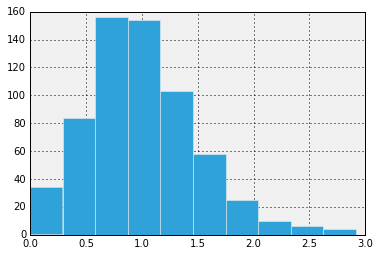

In [157]:
ratio_by_seat["Ratio"].hist()


In [162]:
ratio_by_seat["Ratio"].quantile([0,.2,.4,.6,.8,1.0]).values

array([ 0.        ,  0.61128913,  0.84224666,  1.07994413,  1.38710369,
        2.91584915])

In [161]:
import folium
from IPython.display import HTML

In [167]:
# map = folium.Map(location=[53, 0],zoom_start=6)
# map.choropleth(geo_path='wpc.json', data=ratio_by_seat, columns=['Seat', 'Ratio'],
#              key_on='feature.properties.PCON13NM',threshold_scale=[ 0.0        ,  0.6,  0.84,  1.08,  1.39,
#         3.0],
#              fill_color='OrRd')
# map # embed_map(map)

In [164]:
[x for x in BES_Panel.columns if 'mii' in x]

['miiW1',
 'miiW2',
 'miiW3',
 'miiW4',
 'miiW5',
 'miiW6',
 'miiW7',
 'miieuW7',
 'miiW8',
 'miieuW8',
 'miiW9',
 'miiW10',
 'miilabelcertaintyW1',
 'miilabelcertaintyW4',
 'miilabelcertaintyW3',
 'miilabelcertaintyW2',
 'miilabelcertaintyW5',
 'miilabelcertaintyW6',
 'miilabelW1',
 'miilabelW2',
 'miilabelW3',
 'miilabelW4',
 'miilabelW5',
 'miilabelW6']

In [165]:
BES_Panel['miilabelW5']

0                    nhs
1        economy general
2             Don't know
3                    NaN
4                    NaN
5                    NaN
6              terrorism
7               taxation
8           unemployment
9        economy general
10       economy general
11                   NaN
12                   NaN
13       economy general
14       economy general
15             education
16       economy general
17                   NaN
18                   NaN
19                   NaN
20                   NaN
21                   NaN
22                europe
23       economy general
24                   NaN
25                   NaN
26           immigration
27           immigration
28       economy general
29           immigration
              ...       
64659                NaN
64660                NaN
64661                NaN
64662                NaN
64663                NaN
64664                NaN
64665                NaN
64666                NaN
64667                NaN


In [170]:
Re_leave_by_gor = BES_Panel[BES_Panel["new_eu_split"]=='Re-Leave'].gor.replace("",np.nan).value_counts()

In [183]:
Re_leave_by_gor

Scotland                    503
South East                  363
London                      349
North West                  250
Wales                       218
Yorkshire and the Humber    215
East of England             210
South West                  207
East Midlands               183
West Midlands               179
North East                  104
Northern Ireland              0
Name: gor, dtype: int64

In [173]:
Not_Re_leave_by_gor = BES_Panel[BES_Panel["new_eu_split"]!='Re-Leave'].gor.replace("",np.nan).value_counts()

In [180]:
Not_Re_leave_by_gor.drop("Northern Ireland")

Scotland                    7787
London                      5904
South East                  5749
Wales                       4499
North West                  4307
East of England             3946
Yorkshire and the Humber    3556
South West                  3548
West Midlands               3273
East Midlands               2998
North East                  1832
Name: gor, dtype: int64

In [181]:
ratio = Re_leave_by_gor.drop("Northern Ireland").values/Not_Re_leave_by_gor.drop("Northern Ireland").values
ratio = ratio/ratio.mean()
pd.DataFrame(index = Not_Re_leave_by_gor.drop("Northern Ireland").index,data=ratio)

,0
Scotland,1.115035
London,1.061331
South East,1.047910
Wales,0.959212
North West,0.873720
East of England,0.940529
Yorkshire and the Humber,1.019409
South West,1.007111
West Midlands,0.965152
East Midlands,1.030652


In [191]:
Hard_Remain_by_gor = BES_Panel[BES_Panel["new_eu_split"]=='Hard Remain'].gor.replace("",np.nan).value_counts()

ratio = Re_leave_by_gor.drop("Northern Ireland").values/Hard_Remain_by_gor.drop("Northern Ireland").values
ratio = ratio/ratio.mean()
pd.DataFrame(index = Hard_Remain_by_gor.drop("Northern Ireland").index,columns = ["Re_Leave/HardRemain by region"],data=ratio)

,Re_Leave/HardRemain by region
Scotland,0.954035
London,0.924960
South East,1.049631
North West,0.934775
Wales,0.851683
Yorkshire and the Humber,0.966840
South West,1.037601
East of England,1.035834
West Midlands,1.039606
East Midlands,1.159750


In [187]:
BES_Panel["new_eu_split"].value_counts()

Hard Leave                   12127
Hard Remain                  10667
Re-Leave                      4349
Don't know                    1450
I would/will not vote         1118
Leave but favour sec. ref      608
Name: new_eu_split, dtype: int64

In [192]:
BES_Panel[BES_Panel["new_eu_split"]=='Re-Leave'].pcon.value_counts()

                                             1089
Edinburgh West                                 17
Argyll and Bute                                17
Edinburgh East                                 17
Berwickshire, Roxburgh and Selkirk             17
Dumfries and Galloway                          16
Chipping Barnet                                15
Edinburgh South West                           15
Edinburgh North and Leith                      14
North Ayrshire and Arran                       14
Gordon                                         14
Ross, Skye and Lochaber                        13
Paisley and Renfrewshire South                 13
Kirkcaldy and Cowdenbeath                      13
Falkirk                                        13
Perth and North Perthshire                     12
Glenrothes                                     12
Warwick and Leamington                         12
Streatham                                      12
Inverness, Nairn, Badenoch and Strathspey      11


In [ ]:
#### MOST IMPORTANT ISSUES BY CAMPAIGN DAY ####

In [7]:
BES_data_folder = "../BES_analysis_data/"
BES_code_folder = "../BES_analysis_code/"
BES_numeric = pd.read_hdf( BES_data_folder+"BESW8numeric.hdf", "BESW8numeric" )
print("BES_numeric",  BES_numeric.shape )

BES_numeric (31409, 659)


In [8]:
[x for x in BES_Panel_wave8.columns if "Day" in x]

NameError: name 'BES_Panel_wave8' is not defined

In [ ]:
BES_Panel_wave8 = pd.read_stata(BES_data_folder+"BES2015_W8_v1.6.dta")